## Stock Price Technical Analysis & Financial Metrics for META
1. Introduction & Setup
Objective: This analysis aims to evaluate historical stock price trends using quantitative technical indicators and financial metrics. We will utilize TA-Lib for signal generation (RSI, MACD) and PyNance for risk metrics.

In [2]:
import os
import sys
import warnings
import pandas as pd
import yfinance as yf  # Helper to fetch fresh data if CSV is missing

# Add 'scripts' directory to path to allow importing custom modules
sys.path.insert(0, os.path.dirname(os.getcwd()))

# Import Custom Scripts
from scripts.data_loader import DataLoader
from scripts.stock_analysis import TechnicalAnalyzer, StockVisualizer

# Configuration
warnings.filterwarnings('ignore')
DATA_PATH = '../data/yfinance_data/META.csv'
TICKER = 'META'

print("✅ Libraries and Custom Scripts Loaded.")

✅ Libraries and Custom Scripts Loaded.


#### 2. Data Loading and Preparation
We use the DataLoader class to get the raw stock data. Since technical analysis requires specific columns (Open, High, Low, Close, Volume), we ensure the data is formatted correctly.


In [3]:

# Ensure the file exists
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"❌ Data file not found at: {DATA_PATH}")

# Use your existing loader
loader = DataLoader()
stock_df = loader.load_data(DATA_PATH)

# Verify OHLCV data loaded correctly
print(f"Loaded Data Shape: {stock_df.shape}")
print(stock_df.head())


Loaded Data Shape: (2923, 6)
         Date      Close       High        Low       Open     Volume
0  2012-05-18  37.995762  44.724282  37.767172  41.792356  573576400
1  2012-05-21  33.821495  36.435382  32.797807  36.306177  168192700
2  2012-05-22  30.810066  33.384198  30.750434  32.410203  101786600
3  2012-05-23  31.803938  32.300874  31.167860  31.177799   73600000
4  2012-05-24  32.827625  33.006523  31.575347  32.748117   50237200


### 3. Technical Analysis with TA-Lib
In this section, we initialize the TechnicalAnalyzer class. This encapsulates the logic for applying complex mathematical indicators to the dataframe.

Indicators Applied:

SMA (Simple Moving Average): We calculate the 20-day (short-term) and 50-day (medium-term) averages to identify trend direction.

RSI (Relative Strength Index): Measures momentum to identify overbought (>70) or oversold (<30) conditions.

MACD (Moving Average Convergence Divergence): A trend-following momentum indicator that shows the relationship between two moving averages of a stock's price.

In [4]:
# Initialize the analyzer with the dataframe
analyzer = TechnicalAnalyzer(stock_df)

# Apply the indicators (SMA, RSI, MACD)
# This modifies the internal dataframe and returns the result
df_analyzed = analyzer.apply_talib_indicators()

# Preview the new technical columns
cols_to_show = ['Close', 'SMA_20', 'SMA_50', 'RSI', 'MACD']
print(df_analyzed[cols_to_show].tail())


[1] Calculating Technical Indicators (TA-Lib)...
Indicators added: SMA_20, SMA_50, RSI, MACD variables.
                 Close      SMA_20      SMA_50        RSI      MACD
Date                                                               
2023-12-22  351.224823  332.302945  323.317843  67.333885  6.945367
2023-12-26  352.655975  333.303278  324.115724  68.187000  7.436800
2023-12-27  355.637543  334.239505  324.844828  69.947874  7.974921
2023-12-28  356.124634  335.537503  325.527023  70.237702  8.344500
2023-12-29  351.791290  336.869788  326.262290  64.296803  8.193282


### 4. Financial Metrics with PyNance
We move beyond price trends to analyze risk and return using PyNance. This library is specialized for retrieving and analyzing financial data.

Metrics Calculated:

Volatility: The degree of variation of a trading price series over time.

Sharpe Ratio: The average return earned in excess of the risk-free rate per unit of volatility (a measure of risk-adjusted return).

In [5]:
# Calculate key financial metrics
financial_metrics = analyzer.calculate_financial_metrics()

# Display results in a more readable format
print("Financial Metrics Summary")
print("-" * 50)
print(f"Volatility (Annualized): {financial_metrics['volatility']:.2f}%")
print(f"Sharpe Ratio: {financial_metrics['sharpe_ratio']:.2f}")
print(f"Maximum Drawdown: {financial_metrics['max_drawdown']:.2%}")


Financial Metrics Summary
--------------------------------------------------
Volatility (Annualized): 0.40%
Sharpe Ratio: 0.65
Maximum Drawdown: -76.74%


### 5. Visualization
Finally, we use the StockVisualizer class to interpret the data visually. Charts are essential for spotting entry/exit points that raw numbers might miss.

#### A. Price Trend & Moving Averages

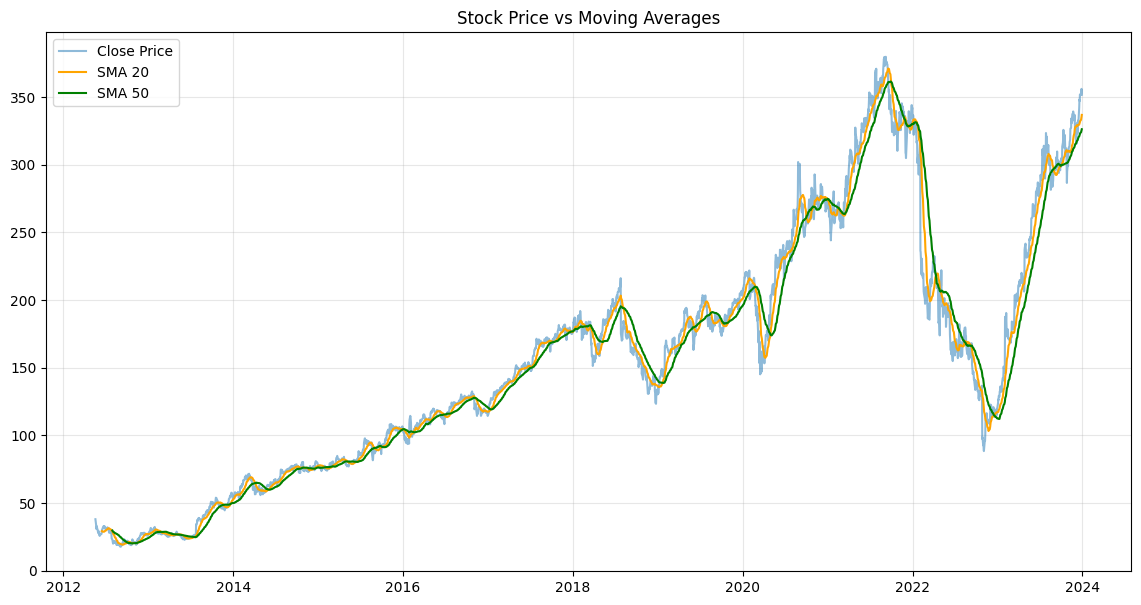

In [6]:
viz = StockVisualizer(df_analyzed)
viz.plot_price_and_ma()

#### B. Momentum (RSI)
This plot helps identify potential reversal points.

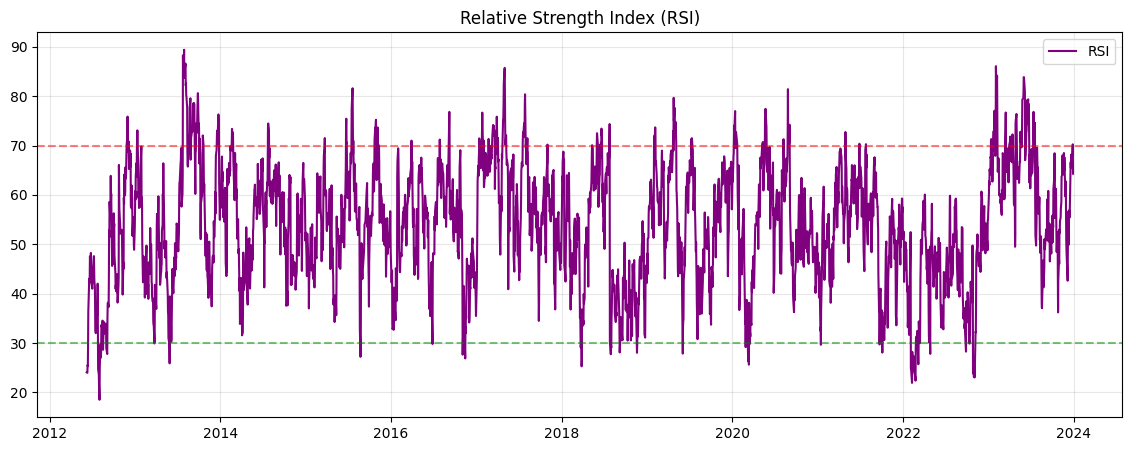

In [7]:
viz.plot_rsi()

#### C. Trend Strength (MACD)
This visualizes the convergence and divergence of the moving averages, providing buy/sell signals.

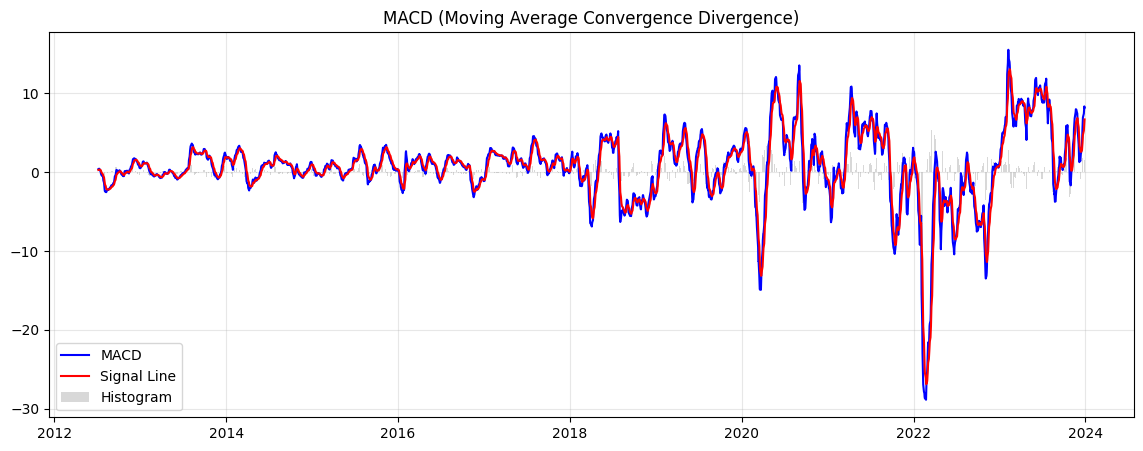

In [8]:
viz.plot_macd()